# Equation de Lotka-Volterra

## 1. Existence des solutions

L'équation de Lotka-Volterra est donné par le système suivant:
$$ (S): \left \{ \begin{aligned} x'(t) &=\alpha x-\beta xy\\
y'(t)&=\delta xy-\gamma y\end{aligned} \right.$$
avec cmme condition initiale $x(0)> 0$  et $y(0) > 0$. 
pour simplifier l'étude nous prendrons $\alpha = \beta = \delta = \gamma = 1$.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def f(u):
    return array([u[0] - u[0] * u[1], u[0] * u[1] - u[1]])

In [4]:
def euler(x0, v0, T, N):
    h = T/N
    sol = zeros((2,N + 1))
    sol[0, 0] = x0
    sol[1, 0] = v0
    for i in range(N):
        sol[:, i + 1] = sol[:, i]+ h * f(sol[:, i])
    return sol

In [10]:
T = 20
N = 10000
t = linspace(0, T, N + 1)

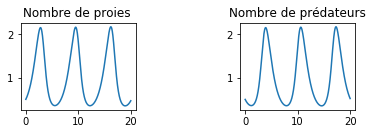

In [16]:
x0 = 0.5
y0 = 0.5
x1 = euler(x0, y0, T, N)

subplots_adjust(wspace=0.9, hspace=0.5)
ax1 = subplot(221)
ax1.plot(t, x1[0, :])
ax1.set_title('Nombre de proies ')

ax2 = subplot(222)
ax2.plot(t, x1[1, :])
ax2.set_title('Nombre de prédateurs')

show()

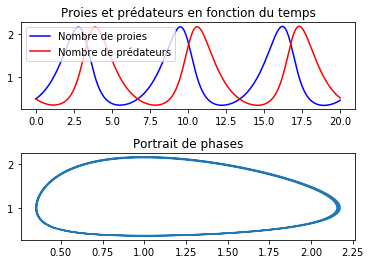

In [18]:
subplots_adjust(wspace=0.9, hspace=0.5)

ax3 = subplot(211)
ax3.plot(t, x1[0, :], 'b', label = "Nombre de proies")
ax3.plot(t, x1[1, :], 'r', label = "Nombre de prédateurs")
ax3.legend(loc = 'upper left')
ax3.set_title('Proies et prédateurs en fonction du temps')

ax4 = subplot(212)
ax4.plot(x1[0, :], x1[1, :])
ax4.set_title('Portrait de phases')

show()

On remarque ici que vu le graphe des solutions que ces dernières sont globales et périodiques.

On se donne la fonction $$\begin{aligned} H: \mathbb{R}_+^\star \times \mathbb{R}_+^\star \rightarrow &\mathbb{R}\\
  (x,y) \mapsto & x - \ln(x) + y - \ln(y) - 2 \end{aligned}$$

On trace cette fonction le lon de quelques trajectoires.

In [21]:
def H(u):
    return u[0, :] - log(u[0, :]) + u[1, :] - log(u[1, :]) - 2

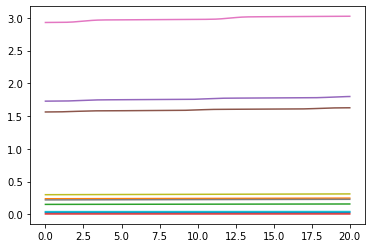

In [23]:
seed(0)
x0 = 2 * rand(10)
y0 = rand(10)
for i in range(10):
    x1 = euler(x0[i], y0[i], T, N)
    plot(t, H(x1))

On peut assumer que H est une constante du mouvement

## 2. Comparaison des Schémas numériques

In [26]:
def heun(x0, v0, T, N):
    h = T/N
    sol = zeros((2,N + 1))
    sol[0, 0] = x0
    sol[1, 0] = v0
    for i in range(N):
        sol[:, i + 1] = sol[:, i]+ h * f(sol[:, i] +h / 2 * f(sol[:, i]))
    return sol

In [27]:
T = 10
N = 100
t = linspace(0, T, N + 1)

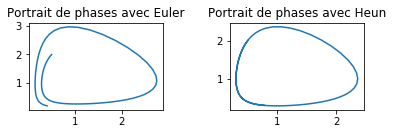

In [29]:
x0 = 0.5
y0 = 0.5
x = euler(x0, v0, T, N)
x1 = heun(x0, v0, T, N)


subplots_adjust(wspace=0.5, hspace=0.5)
ax = subplot(221)
ax.plot(x[0, :], x[1, :])
ax.set_title('Portrait de phases avec Euler')

ax1 = subplot(222)
ax1.plot(x1[0, :], x1[1, :])
ax1.set_title('Portrait de phases avec Heun')

show()

On voit bien que la méthode de Heun est bien plus rapide que celle d'Euler. Le régime périodique est bien mis en évidence avec la méthode de Heun mais bien plus loin avec celle d'Euler.

## 3. Stabilité des points d'équilibre

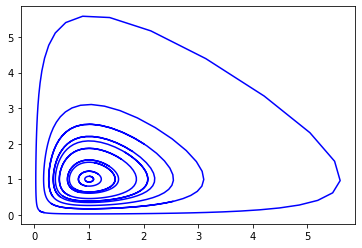

In [36]:
N = 100
X0 = linspace(0.1, 2, 10)
Y0 = linspace(0.1, 2, 10)
for (x0,y0) in zip(X0,Y0):
    x = heun(x0, y0, T, N)
    plot(x[0, :], x[1, :], 'b')
